In [1]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import cv2

In [2]:
accs = []

In [3]:
data_train =pd.read_csv('training_dataset.csv')
data_train .head()

,Mean,std,Variance,Skewness,Entropy,RMS,Kurtios,HMI1,HMI2,HMI3,...,homogeneity4,energy1,energy2,energy3,energy4,correlation1,correlation2,correlation3,correlation4,Class
0,42.088384,50.356683,2535.795494,2.049944,6.553086,8.875129,5.073736,2.617668,7.231273,9.914340,...,0.306209,0.212378,0.206820,0.214469,0.205028,0.895421,0.864810,0.906165,0.862465,0
1,55.212544,46.056565,2121.207208,0.370450,5.375762,9.302612,-0.628678,2.752905,8.030957,11.070417,...,0.513325,0.177499,0.172328,0.180325,0.171641,0.969317,0.959636,0.974818,0.958198,0
2,76.037273,79.565990,6330.746828,0.585233,5.781641,7.635726,-0.877843,2.904895,7.803627,12.448359,...,0.432991,0.230150,0.221221,0.232777,0.221043,0.969677,0.958555,0.973180,0.957760,0
3,49.957904,48.439813,2346.415459,1.237070,5.764681,10.755480,1.467716,2.720641,7.122902,10.259218,...,0.466591,0.179320,0.170887,0.181765,0.170025,0.959890,0.947522,0.966923,0.945591,0
4,53.652053,59.587603,3550.682395,1.574931,4.946379,10.302398,2.218936,2.779911,7.267831,10.447366,...,0.490227,0.232071,0.220649,0.233649,0.221646,0.949499,0.932350,0.958399,0.931763,0


In [4]:
data_test = pd.read_csv('testing_dataset.csv')
data_test.head()

,Mean,std,Variance,Skewness,Entropy,RMS,Kurtios,HMI1,HMI2,HMI3,...,homogeneity4,energy1,energy2,energy3,energy4,correlation1,correlation2,correlation3,correlation4,Class
0,50.539923,57.317611,3285.308586,1.992440,6.159680,11.159507,3.412302,2.619346,7.517582,11.172308,...,0.501064,0.304583,0.295839,0.310390,0.295836,0.903205,0.877960,0.921479,0.879440,0
1,29.926339,52.966868,2805.489070,2.501142,4.874646,7.413451,5.950644,2.483199,7.457868,9.281168,...,0.512756,0.404275,0.381825,0.421123,0.409811,0.900932,0.856400,0.937271,0.912609,0
2,44.846301,52.992918,2808.249404,1.579595,5.681016,10.138107,1.537324,2.583508,6.966842,10.003352,...,0.320199,0.141508,0.134624,0.145919,0.134366,0.938467,0.919530,0.952549,0.919808,0
3,29.401541,32.959523,1086.330163,1.286740,5.590507,8.397827,1.646578,2.538401,8.401280,9.991805,...,0.282261,0.101256,0.095177,0.102132,0.099396,0.850481,0.784068,0.853707,0.829843,0
4,54.835967,33.073988,1093.888670,1.096225,5.266952,10.538600,-0.244438,2.772886,7.679045,11.160145,...,0.494495,0.328976,0.322931,0.332120,0.320055,0.907303,0.882022,0.915182,0.877200,0


In [5]:
import warnings
warnings.filterwarnings("ignore")

In [6]:
# df = df.dropna()

missing_data = ['Area', 'Perimeter', 'Circle', 'Convex Area', 'Solidity', 'Equivalent Diameter', 'Major Axis', 'Minor Axis']
for i in missing_data:
    fill_list = data_train[i].dropna().tolist()
    data_train [i] = data_train[i].fillna(pd.Series(np.random.choice(fill_list , size = len(data_train.index))))
# data_train.isnull().sum()

In [7]:
# df = df.dropna()

missing_data = ['Area', 'Perimeter', 'Circle', 'Convex Area', 'Solidity', 'Equivalent Diameter', 'Major Axis', 'Minor Axis']
for i in missing_data:
    fill_list = data_test[i].dropna().tolist()
    data_test[i] = data_test[i].fillna(pd.Series(np.random.choice(fill_list , size = len(data_test.index))))
# data_test.isnull().sum()

In [8]:
X = data_train.drop(columns=["Class"])
y = data_train["Class"]
Xt = data_test.drop(columns=["Class"])
yt = data_test["Class"]

feature selection

In [9]:
from sklearn.feature_selection import SelectKBest, mutual_info_classif

# Initialize the feature selector
k_best = SelectKBest(score_func=mutual_info_classif, k=25)  # Select the top 2 features based on mutual information

feature_names = ['Mean', 'std', 'Variance','Skewness','Entropy', 'RMS', 'Kurtios', 'HMI1', 'HMI2', 'HMI3',
       'HMI4', 'Area', 'Perimeter', 'Circle', 'Convex Area', 'Solidity',
       'Equivalent Diameter', 'Major Axis', 'Minor Axis', 'contrast1',
       'contrast2', 'contrast3', 'contrast4', 'dissimilarity1',
       'dissimilarity2', 'dissimilarity3', 'dissimilarity4', 'homogeneity1',
       'homogeneity2', 'homogeneity3', 'homogeneity4', 'energy1', 'energy2',
       'energy3', 'energy4', 'correlation1', 'correlation2', 'correlation3',
       'correlation4']

# Apply feature selection to the data
X_selected = k_best.fit_transform(X, y)

# Get the selected feature indices and scores
selected_indices = k_best.get_support(indices=True)
selected_scores = k_best.scores_

# Sort the features based on scores in ascending order
sorted_features = sorted(zip(selected_indices, selected_scores), key=lambda x: x[1], reverse=True)
X_select = pd.DataFrame()
# Print the top 20 features in ascending order
ll=[]
for idx, score in sorted_features[:25]:
    ll.append(feature_names[idx])

models with whole dataset

In [10]:
from sklearn.model_selection import train_test_split
X_train,X_val,y_train,y_val = train_test_split(X,y,test_size=0.2,random_state=42,shuffle=True)
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=42)

Linear Regression

In [11]:
from sklearn.linear_model import LogisticRegression
classifier=LogisticRegression(random_state=0)
lr_model=classifier.fit(X_train,y_train)
y_pred=lr_model.predict(X_test)
from sklearn.metrics import classification_report, confusion_matrix 
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.67      0.83      0.74       346
           1       0.47      0.48      0.48       284
           2       0.58      0.52      0.55       262
           3       0.53      0.39      0.45       251

    accuracy                           0.58      1143
   macro avg       0.56      0.56      0.55      1143
weighted avg       0.57      0.58      0.57      1143



Building The Model

In [48]:
# import modules to create model

from keras.models import Sequential
from scikeras.wrappers import KerasClassifier
from sklearn.model_selection import GridSearchCV
from keras.layers import Dense, Activation,  Dropout
from keras.activations import relu, sigmoid
param_grid= {
    'activation':['sigmoid', 'relu'],
    'layers':[(40, 20), (45, 30, 15), (60,40,25,10),(80,60,40,25,10)],
    'batch_size':[128, 256]
}
#Build Model

def build_model(layers, activation):
    model = Sequential()
    for i, nodes in enumerate(layers):
        if i==0:
            model.add(Dense(nodes,input_dim=X_train.shape[1]))
            model.add(Activation(activation))
            
        else:
            model.add(Dense(nodes))
            model.add(Activation(activation))
            
    model.add(Dense(1)) 
    
    model.compile(optimizer='adam', loss='binary_crossentropy',metrics=['accuracy'])
    return model
    
model = KerasClassifier(build_fn=build_model, verbose=0, activation=['sigmoid', 'relu'], layers = [(40, 20), (45, 30, 15), (60,40,25,10),(80,60,40,25,10)], batch_size= [128, 256])

In [49]:
grid = GridSearchCV(estimator=model, param_grid=param_grid, cv=5)

In [50]:
#fit train data
grid_result = grid.fit(X_train, y_train,epochs=10)

In [51]:
grid_result

GridSearchCV(cv=5,
             estimator=KerasClassifier(activation=['sigmoid', 'relu'], batch_size=[128, 256], build_fn=<function build_model at 0x0000027D16BF3880>, layers=[(40, 20), (45, 30, 15), (60, 40, 25, 10), (80, 60, 40, 25, 10)], verbose=0),
             param_grid={'activation': ['sigmoid', 'relu'],
                         'batch_size': [128, 256],
                         'layers': [(40, 20), (45, 30, 15), (60, 40, 25, 10),
                                    (80, 60, 40, 25, 10)]})

In [61]:
grid.fit(X_train, y_train)

# Predict the labels for the test set
y_pred = grid.predict(X_test)

# Print the classification report
print(classification_report(y_test, y_pred))


              precision    recall  f1-score   support

           0       0.91      0.91      0.91       346
           1       0.79      0.70      0.74       284
           2       0.63      0.71      0.67       262
           3       0.72      0.70      0.71       251

    accuracy                           0.77      1143
   macro avg       0.76      0.76      0.76      1143
weighted avg       0.77      0.77      0.77      1143



Hyperparameter Tuning

In [36]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV

# Choose a model (e.g., Random Forest)
model = RandomForestClassifier()

# Define hyperparameters and their ranges
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# Perform grid search to find the best combination of hyperparameters
grid_search = GridSearchCV(estimator=model, param_grid=param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_train, y_train)

# Get the best hyperparameters
best_params = grid_search.best_params_

# Train the model with the best hyperparameters
best_model = RandomForestClassifier(**best_params)
best_model.fit(X_train, y_train)

# Evaluate the best model on the test set
test_accuracy = best_model.score(X_test, y_test)
print("Test Accuracy:", test_accuracy)
# Evaluate the best model on the train set
train_accuracy = best_model.score(X_train, y_train)
print("Train Accuracy:", train_accuracy)


Test Accuracy: 0.8993875765529309
Train Accuracy: 1.0


In [15]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV

# Choose a model (e.g., Random Forest)
model = RandomForestClassifier()

# Define hyperparameters and their ranges
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# Perform grid search to find the best combination of hyperparameters
grid_search = GridSearchCV(estimator=model, param_grid=param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_train, y_train)

# Get the best hyperparameters
best_params = grid_search.best_params_

# Train the model with the best hyperparameters
best_model = RandomForestClassifier(**best_params)
best_model.fit(X_train, y_train)

# Evaluate the best model on the test set
test_accuracy = best_model.score(X_test, y_test)
print("Test Accuracy:", test_accuracy)

Test Accuracy: 0.8923884514435696


Random Forest

In [30]:
from sklearn.ensemble import RandomForestClassifier
rf_clf = RandomForestClassifier()
# Fit the parameters before oversampling:
rf_clf.fit(X_train, y_train)
print(f"Train Acc of Random Forest : {rf_clf.score(X_train,y_train)}")
print(f"Validation Acc of Random Forest : {rf_clf.score(X_val,y_val)}")
print(f"Test Acc of Random Forest : {rf_clf.score(Xt,yt) }")
accs.append([rf_clf.score(X_train,y_train),rf_clf.score(X_val,y_val),rf_clf.score(Xt,yt)])

Train Acc of Random Forest : 1.0
Validation Acc of Random Forest : 0.9011373578302713
Test Acc of Random Forest : 0.9181957186544343


SVM

In [31]:
from sklearn.svm import SVC
clf1 = SVC(kernel='rbf')
clf1.fit(X_train, y_train)
print(f"Train Acc of SVM : {clf1.score(X_train,y_train)}")
print(f"Validation Acc of SVM : {clf1.score(X_val,y_val)}")
print(f"Test Acc of SVM : {clf1.score(Xt,yt) }")
accs.append([clf1.score(X_train,y_train),clf1.score(X_val,y_val),clf1.score(Xt,yt)])

Train Acc of SVM : 0.533493870402802
Validation Acc of SVM : 0.5214348206474191
Test Acc of SVM : 0.4984709480122324


XGBOOST

In [32]:
## make xgboost classifier

from xgboost import XGBClassifier
xgb = XGBClassifier()
xgb.fit(X_train,y_train)
print(f"Train acc of XGBoost: {xgb.score(X_train,y_train)}")
print(f"Validation Acc of XGBoost : {xgb.score(X_val,y_val)}")
print(f"Test Acc of XGBoost : {xgb.score(Xt,yt) }")
accs.append([xgb.score(X_train,y_train),xgb.score(X_val,y_val),xgb.score(Xt,yt)])

Train acc of XGBoost: 1.0
Validation Acc of XGBoost : 0.9238845144356955
Test Acc of XGBoost : 0.9273700305810397


PCA and StandardScaler

In [25]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
pca_m = PCA(n_components=39)
scaler = StandardScaler()
# new_X = pca_m.fit_transform(X)
new_X = scaler.fit_transform(X)
scaler2 = StandardScaler()
# new_Xt = pca_m.fit_transform(Xt)
new_Xt = scaler2.fit_transform(Xt)

split data after pca and scaler

In [26]:
X_trainn,X_valn,y_trainn,y_valn = train_test_split(new_X,y,test_size=0.2,random_state=42,shuffle=True)

RF PCA

In [27]:
from sklearn.ensemble import RandomForestClassifier
rf_clf2 = RandomForestClassifier()
# Fit the parameters before oversampling:
rf_clf2.fit(X_trainn, y_trainn)
print(f"Train Acc of Random Forest PCA : {rf_clf2.score(X_trainn,y_trainn)}")
print(f"Validation Acc of Random Forest PCA  : {rf_clf2.score(X_valn,y_valn)}")
print(f"Test Acc of Random Forest PCA  : {rf_clf2.score(new_Xt,yt) }")
accs.append([rf_clf2.score(X_trainn,y_trainn),rf_clf2.score(X_valn,y_valn),rf_clf2.score(new_Xt,yt)])

Train Acc of Random Forest PCA : 1.0
Validation Acc of Random Forest PCA  : 0.8967629046369204
Test Acc of Random Forest PCA  : 0.8302752293577982


SVM PCA

In [28]:
from sklearn.svm import SVC
clf2 = SVC(kernel='rbf')
clf2.fit(X_trainn, y_trainn)

print(f"Train Acc of SVM PCA : {clf2.score(X_trainn,y_trainn)}")
print(f"Validation Acc of SVM PCA  : {clf2.score(X_valn,y_valn)}")
print(f"Test Acc of SVM PCA  : {clf2.score(new_Xt,yt) }")
accs.append([clf2.score(X_trainn,y_trainn),clf2.score(X_valn,y_valn),clf2.score(new_Xt,yt)])

Train Acc of SVM PCA : 0.8544220665499125
Validation Acc of SVM PCA  : 0.8521434820647419
Test Acc of SVM PCA  : 0.8065749235474006


XGBoost PCA

In [33]:
## make xgboost classifier

xgb2 = XGBClassifier()
xgb2.fit(X_trainn,y_trainn)
print(f"Train acc of XGBoost PCA : {xgb2.score(X_trainn,y_trainn)}")
print(f"Validation Acc of XGBoost PCA  : {xgb2.score(X_valn,y_valn)}")
print(f"Test Acc of XGBoost PCA  : {xgb2.score(new_Xt,yt) }")
accs.append([xgb2.score(X_trainn,y_trainn),xgb2.score(X_valn,y_valn),xgb2.score(new_Xt,yt)])

Train acc of XGBoost PCA : 1.0
Validation Acc of XGBoost PCA  : 0.9230096237970253
Test Acc of XGBoost PCA  : 0.8685015290519877


Ensembel Method

In [12]:
# importing utility modules
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

# importing machine learning models for prediction
from sklearn.ensemble import RandomForestRegressor
import xgboost as xgb
from sklearn.linear_model import LinearRegression
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=42)


# initializing all the model objects with default parameters
model_1 = LinearRegression()
model_2 = xgb.XGBRegressor()
model_3 = RandomForestRegressor()

# training all the model on the training dataset
model_1.fit(X_train, y_train)
model_2.fit(X_train, y_train)
model_3.fit(X_train, y_train)

# predicting the output on the validation dataset
pred_1 = model_1.predict(X_test)
pred_2 = model_2.predict(X_test)
pred_3 = model_3.predict(X_test)

# final prediction after averaging on the prediction of all 3 models
pred_final = (pred_1+pred_2+pred_3)/3.0

# printing the mean squared error between real value and predicted value
print(mean_squared_error(y_test, pred_final))

0.19326002144482027


In [34]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report

def evaluate_classification_model(model, X_test, y_test):
    # Make predictions on the test set
    y_pred = model.predict(X_test)

    # Compute evaluation metrics
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred, average='weighted')
    recall = recall_score(y_test, y_pred, average='weighted')
    f1 = f1_score(y_test, y_pred, average='weighted')
    cm = confusion_matrix(y_test, y_pred)

    # Print the evaluation metrics
    print("Accuracy:", accuracy)
    print("Precision:", precision)
    print("Recall:", recall)
    print("F1-score:", f1)

    # Plot the confusion matrix
    labels = np.unique(y_test)
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=labels, yticklabels=labels)
    plt.title('Confusion Matrix')
    plt.xlabel('Predicted Label')
    plt.ylabel('True Label')
    plt.show()

Accuracy: 1.0
Precision: 1.0
Recall: 1.0
F1-score: 1.0


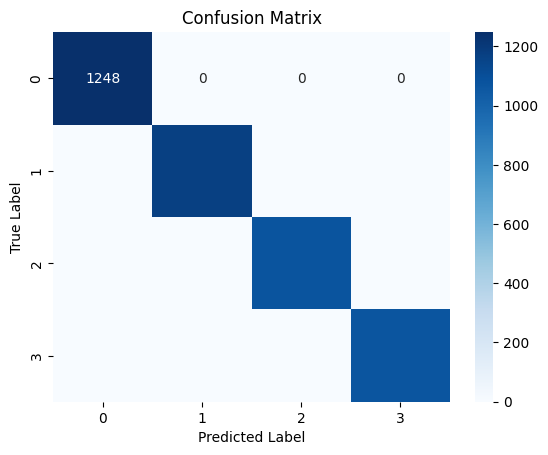

In [42]:
evaluate_classification_model(rf_clf,X_train, y_train)

Accuracy: 0.533493870402802
Precision: 0.5844142180625619
Recall: 0.533493870402802
F1-score: 0.510241736522251


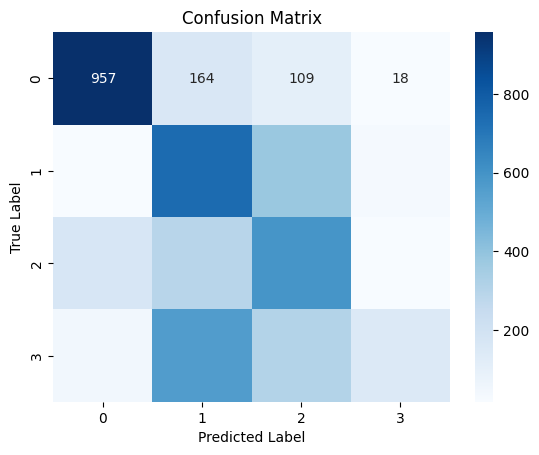

In [41]:
evaluate_classification_model(clf1,X_train,y_train)

Accuracy: 1.0
Precision: 1.0
Recall: 1.0
F1-score: 1.0


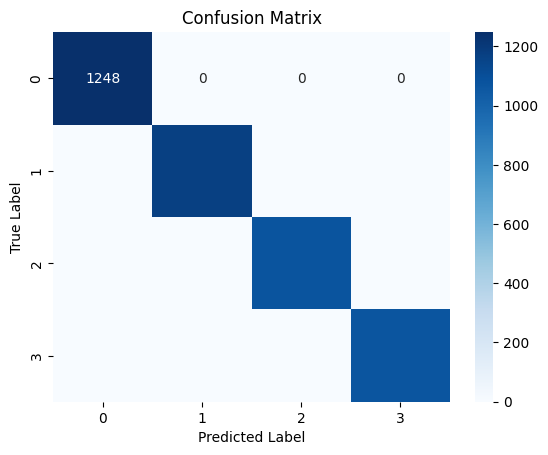

In [38]:
evaluate_classification_model(xgb,X_train,y_train)